<a href="https://colab.research.google.com/github/jlit94/AI/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7
Author: A.J. Litchield

For this assingment, we are being asked to create an MLPClassifier that can take in data about asteroids and perform a binary classification to determine if a given asteroid is hazardous or non-hazardous.

To get started, we must first import the dataset. The data is saved in a csv file, so we will need to use the pandas library to read in the data and save it in a variable. Then, we need to make that data into a dataframe so that we can manipulate it.

In [80]:
import pandas as pd
import os

data = pd.read_csv("/content/nasa_asteroid.csv")

space_rock = pd.DataFrame(data)

Now that we have the data imported, we need to split the dataframe into two categories, data and targets. Our target here (y) is whether or not the meteroid has been classified as hazardous or not. To train out model on that binary classification, we are using our metrics for each meteroid given to us in the dataset and saved here in the X variable. The variety of neural network that we are setting up is extremely sensitive to differences in feature scales, so we use the scaler functionality to remove that effect. Below, we are also importing a few more libraries and the functionality that allows us to train and analyze our network.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the asteroid dataset

y = space_rock.iloc[ : , -1]
X = space_rock.drop(columns=['Close Approach Date', 'Orbiting Body',
                             'Orbit Determination Date', 'Equinox', 'Hazardous'])

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

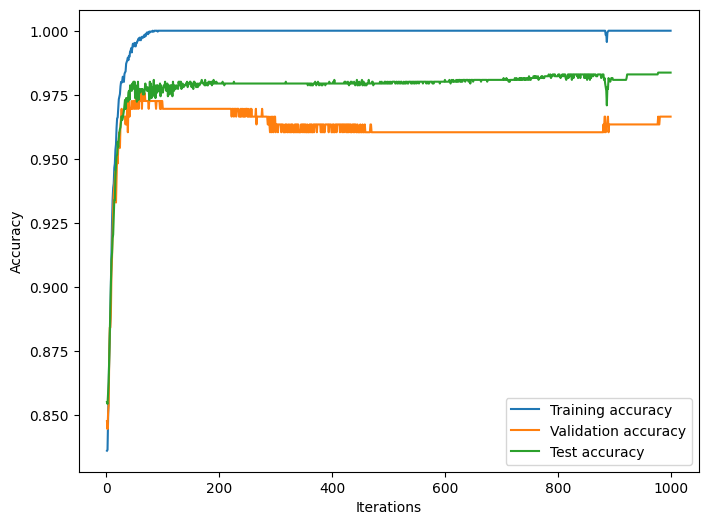

In [78]:
# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
Xs_train, Xs_val, y_train, y_val = train_test_split(Xs_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(40,50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(Xs_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(Xs_train, y_train))
    val_accuracies.append(mlp.score(Xs_val, y_val))
    test_accuracies.append(mlp.score(Xs_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We now have a fully trained network. Our network was set up to contain 4 layers––Input, two hidden layers (one with 40 neurons, and one with 50), and the output layer––and we set iterations for training at 1,000 without any stop early clause. Once we train our model on these parameters, we plot the accuracy of the training data, the validation data, and the test data all on the above graph. At first glance, it appears we have some discrepancies between the results, but judging by the scale of the accuracy axies, we can see that all of our sets are over 95% accurate, with the most important metric, the test accuracy, coming in at over 97.5% which is an excellent result.

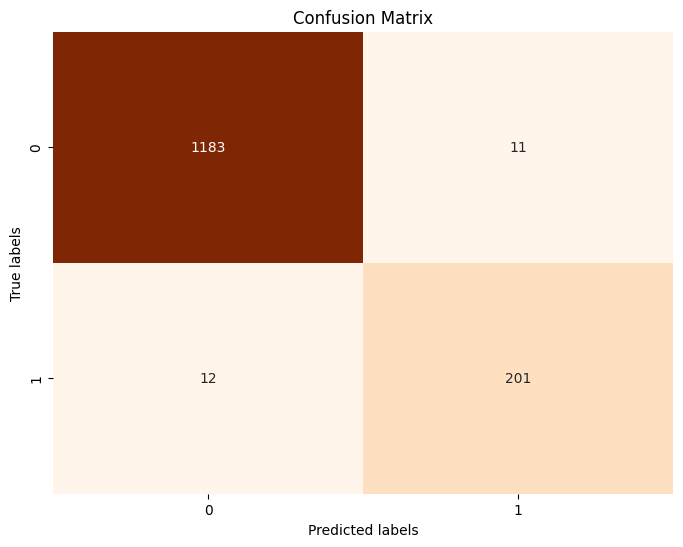

In [85]:
#Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(Xs_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model.

It allows the visualization of the performance of an algorithm by showing the number of correct and incorrect classifications, as well as the types of errors made by the classifier.

In a binary classification problem, the confusion matrix is a 2x2 matrix with four entries:

True Positive (TP): The number of observations that were correctly predicted as positive.
False Positive (FP): The number of observations that were incorrectly predicted as positive (actually negative).
True Negative (TN): The number of observations that were correctly predicted as negative.
False Negative (FN): The number of observations that were incorrectly predicted as negative (actually positive).

We can see that in our confusion matrix our model has 1183 true negatives, 12 false negatives, 201 true positives, and 11 false positives.

Now let's move on to the loss curve.

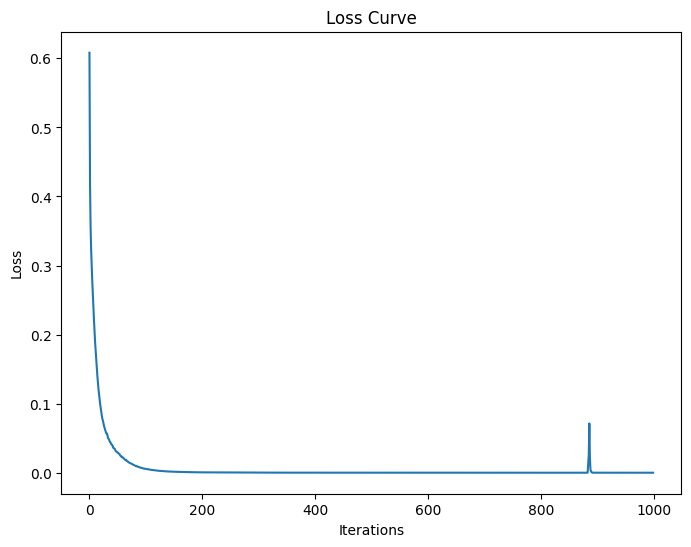

In [87]:
#Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

We see in this loss curve that around 50 or so iterations, the error for this model drops precipitously and then maintains that rate until somewhere around 900 iterations where there is a bit of an unexpected spike in error, reaching almost 10%.

Overall, we can deduce that this is a fairly accurate model. Let's take a look at the official values for training and test accuracy below.

In [88]:
#Calculate the overall training and test accuracies
train_accuracy = mlp.score(Xs_train, y_train)
test_accuracy = mlp.score(Xs_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9836531627576404


Our theory that we have a highly accurate model is confirmed again by these numbers. But what happens if we change the parameters of this model? Below is a table of value that depict some experiments with new parameter values and how that impacted the training and test accuracies.

In [94]:
# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
Xs_train, Xs_val, y_train, y_val = train_test_split(Xs_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(Xs_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(Xs_train, y_train))
    val_accuracies.append(mlp.score(Xs_val, y_val))
    test_accuracies.append(mlp.score(Xs_test, y_test))

#Calculate the overall training and test accuracies
train_accuracy = mlp.score(Xs_train, y_train)
test_accuracy = mlp.score(Xs_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9772565742714996


Above is the code I used to tinker with the parameters. Below is the table of my results from various tests:


```
# of Hidden Layers,# of Neurons (per HL),# of Neurons (total),Test Accuracy (%),Training Accuracy (%)
1,90,90,98.152,100
1,50,50,98.152,100
1,10,10,98.934,99.864
2,5,10,98.649,100
2,"40, 50",90,98.365,100
3,2,6,99.147,99.966
3,30,90,97.726,100
```


We can see from these tests that there is not much variability in the results. From this, we can infer a few things about MLPs, our model, and the data.

First, we can assume that MLPs are highly accurate at classifying data, even large datasets like the one we provided that had well over 4,000 entries. We are also using 1,000 iterations for each test here, that number could just be large enough that over time the MLP becomes extremely accurate, no matter the size of the parameters. We can see this in the fact that a model that has 3 hidden layers of just 2 neurons each, produces similar results to a model with 2 hidden layers that have 40 and 50 neurons respectively.

Second, our model coudl be highly accurate because we are only performing a binary classification which by definition only has two possible outcomes. It makes sense then that there is not much of a deviation between results.

Lastly, our data. This data is clearly extremely intricate with a high degree of exactness (this data is from NASA after all). This is a great example of how these models can fall prey to the GIGO effect. Because we are feeding a large amount of detailed data, our model is inherently more accurate.